In [1]:
from pathlib import Path
import rsa
import utils

conf_strategy = 'simple'
atlas_name = 'msdl'
network_name = 'DMN'
n_components = 0
threshold = 95
low_pass = 0.08
high_pass = 0.01
smoothing_fwhm = 6.
t_r = 2.
data_path = Path('neurocovid_derivatives')
clinical_file = 'clinical_data.csv'
subjects = [sub for sub in data_path.glob('sub-*') if sub.is_dir()]

In [2]:
subjects_df = utils.load_clinical_data(clinical_file)
utils.load_datapaths(subjects, subjects_df)

bold_imgs, mask_imgs = subjects_df['func_path'].values, subjects_df['mask_path'].values
if atlas_name:
    atlas = utils.load_atlas(atlas_name)
    if network_name:
        atlas = utils.extract_network(atlas, network_name)
else:
    atlas = utils.atlas_from_regions(bold_imgs, mask_imgs, n_components, low_pass, high_pass, smoothing_fwhm,
                                     t_r, conf_strategy)

In [3]:
conn_dist, beh_dist = rsa.rsa(subjects_df, conf_strategy, atlas, low_pass, high_pass, smoothing_fwhm, t_r, 'output')

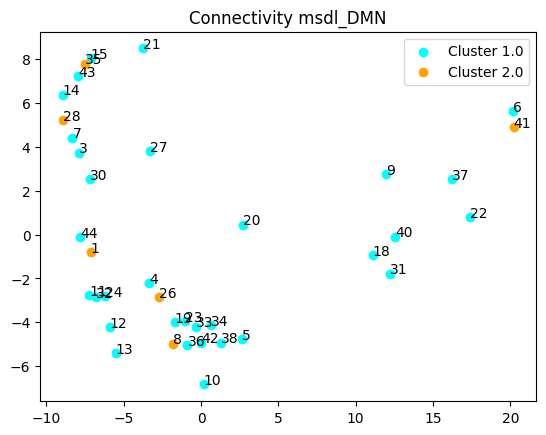

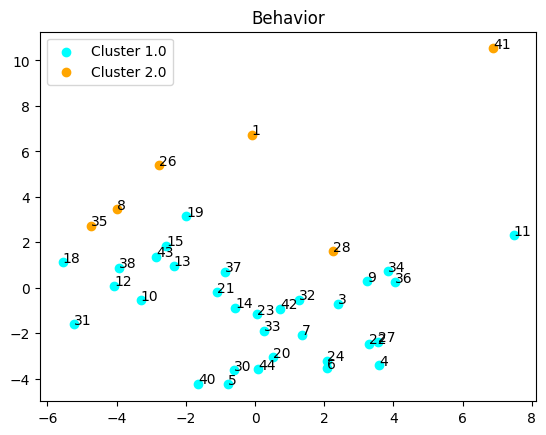

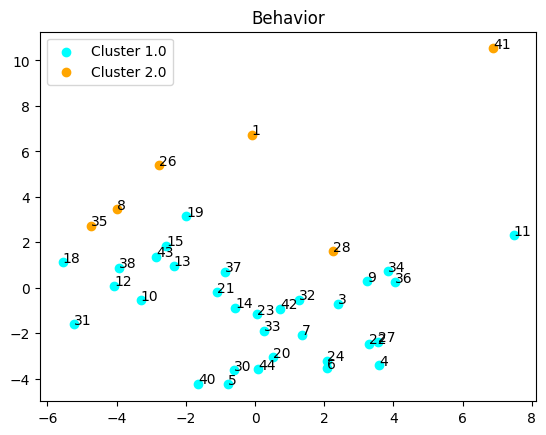

In [4]:
utils.plot_rdm(conn_dist, subjects_df, f'Connectivity {atlas.name}', 'PCA')
utils.plot_rdm(beh_dist, subjects_df, f'Behavior', 'PCA')